In [2]:
from lda_lib import lda_ajp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = np.load('datasets/fashion_train.npy')
print("Dataset shape: ", dataset.shape)

# dataset = np.random.rand(4, 10)
# labels = np.array([0, 0, 1, 2]).reshape(-1, 1)
# dataset = np.hstack((dataset, labels))

Dataset shape:  (10000, 785)


In [12]:
X = dataset[:, :-1]
y = dataset[:, -1]
X.shape

(10000, 784)

In [71]:
lin_disc = lda_ajp(X, y)

In [72]:
# checking determinant in the scatter-within matrix
lin_disc.scatter_det()

Matrix contains extreme values, attempting to compute determinant:
Matrix is singular and cannot be inverted (determinant is inf)
Normalizing matrix and trying again...
Determinant: 0.0


c:\Users\obe\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


0.0

In [121]:
# finding the top 2 eigenvectors
lda = lin_disc.main_lds(2)
# print(lda)
# print(lda.shape)
print(lda.shape)
print(X.shape)

(784, 2)
(10000, 784)


(2, 10000)


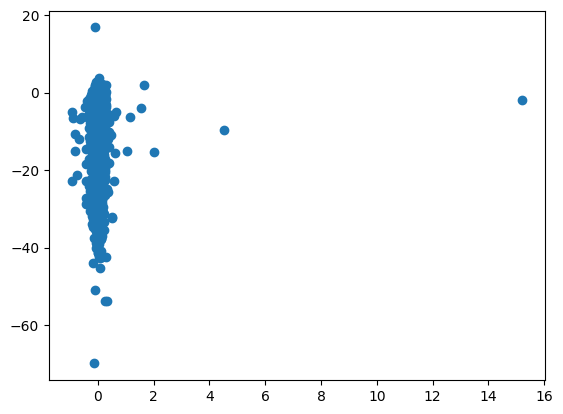

In [127]:
# projecting onto the first 2 LDA components 
projection= np.dot(lda.T,X.T)
print(projection.shape)
plt.scatter(projection[0,:],projection[1,:])


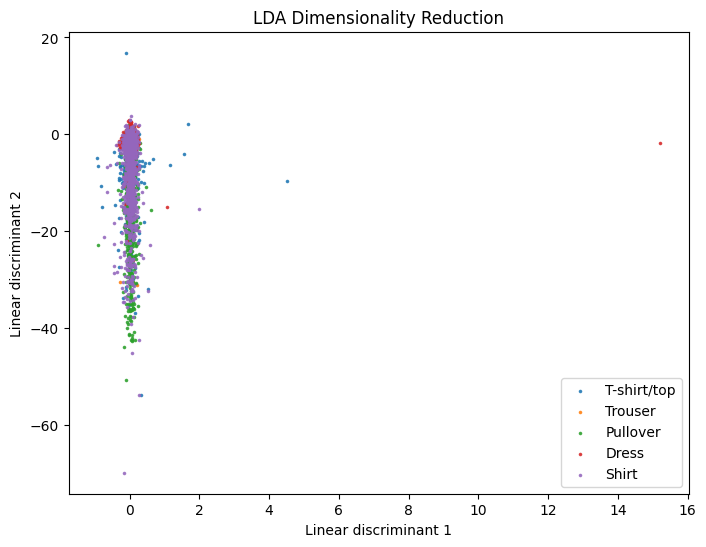

In [128]:
# plotting the LDA projection 
labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}
# show random image and its label
index = np.random.randint(0, len(X))
image = X[index]
label = y[index]
label_name = labels_dict[label]
# plt.scatter(projection[1], projection[0])
projection=projection.T

plt.figure(figsize=(8, 6))
for label_value in np.unique(y):
    indices = np.where(y == label_value)
    plt.scatter(projection[indices, 0], projection[indices, 1], label=labels_dict[label_value], s=10, alpha=0.8, marker='.', linewidths=1)

plt.title('LDA Dimensionality Reduction')
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend()
plt.show()

In [129]:
# plotting lda projection on the top 2 eigenvectors

plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(lda[y == label, 0], lda[y == label, 1], label=label)
plt.legend()
plt.title("LDA Projection on the top 2 eigenvectors")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 784 but corresponding boolean dimension is 10000

<Figure size 800x600 with 0 Axes>